# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.121929e+01     6.944777e+00
 * time: 0.005149126052856445
     1     2.985563e+01     6.174145e+00
 * time: 0.01602315902709961
     2     1.729342e+01     4.359926e+00
 * time: 0.04778003692626953
     3     1.334550e+01     1.872398e+00
 * time: 0.07185101509094238
     4     1.181718e+01     1.689622e+00
 * time: 0.09475016593933105
     5     1.103172e+01     9.696735e-01
 * time: 0.11305999755859375
     6     1.089760e+01     2.051277e+00
 * time: 0.13114714622497559
     7     1.029040e+01     1.037824e+00
 * time: 0.14958906173706055
     8     9.799831e+00     1.034036e+00
 * time: 0.16841506958007812
     9     9.489101e+00     9.832110e-01
 * time: 0.186967134475708
    10     9.215722e+00     7.016166e-01
 * time: 0.20523405075073242
    11     9.031166e+00     4.153139e-01
 * time: 0.22405219078063965
    12     9.021485e+00     7.508015e-01
 * time: 0.23844218254089355
    13     8.907107e+00     6.776175e-01
 * time: 

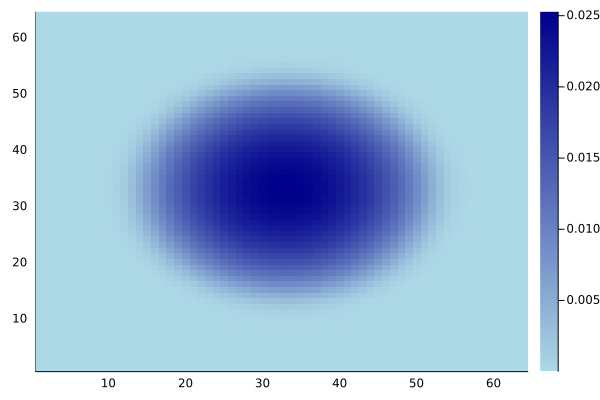

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)